<a href="https://colab.research.google.com/github/hchh25/huchunhao.github.io/blob/main/Class_2_Python_Basics_Fall_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Read CSV as pandas data frame
import pandas as pd
df=pd.read_csv('superstore.csv')
df

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
len(df)

In [ ]:
df.describe()

## **Task 1:** Use the describe function to get summary of all the variables

In [ ]:
df['Category'].value_counts()

In [ ]:
df['Region'].nunique()

In [ ]:
df['Sales'].dtypes

In [ ]:
# Select top rows
df.head(2)

In [ ]:
# Select bottom rows
df.tail(2)

In [ ]:
# Select random fraction of rows
df.sample(frac=0.5)

In [ ]:
# Select random fraction of rows
df.sample(n=2)

In [ ]:
# Select using idex values
df.iloc[1:3]

In [ ]:
# Select rows by condition
df.nlargest(2, 'Sales')

In [ ]:
# Select rows by condition
df.nsmallest(2, 'Profit')

In [ ]:
# Select Column by name
df[['Category']]

In [ ]:
df[['Category','Region']]

In [ ]:
df.loc[:,'Category':'Region']

In [ ]:
df.loc[1:3,'Category':'Region']

In [ ]:
df.iloc[:,1:2]

In [ ]:
df.iloc[1:3,1:2]

In [ ]:
df.loc[df['Profit']>15]

In [ ]:
df.loc[df['Profit']>15,['Category','Sales']]

In [ ]:
df.sort_values(by='Sales', ascending=False)

## Central Tendencies

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
df_iris = pd.read_csv('iris.csv')
df_irisNA = pd.read_csv('irisNA.csv')

In [ ]:
# Using Pandas
print("Mean value:",df_iris['petal.length'].mean()) 
print("Median value:",df_iris['petal.length'].median()) 
print("Mode:",df_iris['petal.length'].mode()) 
print("Mode:",df_iris['variety'].mode()) 

In [ ]:
# Using Pandas with missing values in data
print("Mean value:",df_irisNA['petal.length'].mean(skipna=False)) 
print("Median value:",df_irisNA['petal.length'].median()) 
print("Mode:",df_irisNA['petal.length'].mode()) 

In [ ]:
# Using Numpy
print(np.mean(df_iris['petal.length']))
print(np.median(df_iris['petal.length']))

In [ ]:
# Using Numpy with missing values in data
print(np.nanmean(df_irisNA['petal.length']))
print(np.nanmedian(df_irisNA['petal.length']))

In [ ]:
# Using Scipy for mode
from scipy import stats
stats.mode(df_iris['variety'])

In [ ]:
stats.mode(df_irisNA['petal.length'],nan_policy='omit')

## Dispersion or Spread

In [ ]:
# Quantile
df['petal.length'].quantile(0.25)

In [ ]:
# Standard deviation and Variance using Pandas
print("Standard deviation value:",df['petal.length'].std()) 
print("Variance value:",df['petal.length'].var()) 

In [ ]:
# Standard deviation and Variance using Numpy
print("Standard deviation value:",np.std(df['petal.length']))
print("Variance value:",np.var(df['petal.length']))

## Adding Column

In [ ]:
df['ratio'] = df['Sales']/df['Quantity']
df

Insert function can also be used to add a column

## Handling Missing Values

In [ ]:
df_irisNA = pd.read_csv('irisNA.csv')
df_irisNA

In [ ]:
# Find missing values
df_irisNA.isna()

In [ ]:
# Check NAs in columns
df_irisNA['variety'].isna()

In [ ]:
df_irisNA['variety'].isna().value_counts()

In [ ]:
df_irisNA['variety'].fillna('other', inplace=True)
df_irisNA

## String Operations

In [ ]:
# Upper case
df['City'].str.upper()

In [ ]:
# Lower case
df['City'].str.lower()

In [ ]:
# Replace strings
df['Country/Region'].str.replace('United States', 'US')

In [ ]:
# Split strings
df['Customer Name'].str.split()

## **Task 2:** Split 'Order ID' column using '-' as the split condition

In [ ]:
# Check strings
df['Category'].str.contains('i')

In [ ]:
# Find strings
df['Category'].str.find('i')

In [ ]:
# Find strings
df['Category'].str.findall('Supplies')

## Date Operations

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Ship Date']-df['Order Date']

In [ ]:
df['Order Date'].dt.year

In [ ]:
df['Order Date'].dt.day

In [ ]:
df['Order Date'].dt.month

In [ ]:
df['Order Date'].dt.week

## Grouping Operations

In [ ]:
print(df.groupby('Category').first(3))

In [ ]:
print(df.groupby('Category')['Sales'].sum())

In [ ]:
print(df.groupby('Category')['Sales', 'Profit'].sum())

In [ ]:
print(df.groupby(['Category','Region'])['Sales','Profit'].sum())

In [ ]:
print(df.groupby(['Category','Region'])['Sales','Profit'].count())

In [ ]:
import seaborn as sns
df2 = df.groupby('Category',as_index=False)['Sales'].sum()
sns.barplot(x= 'Category', y= 'Sales', data = df2)

## **Task 3:** From the Google Mobility data compute the average change in mobility for each state. Include all the points of interest in the calculation.

## **Task 4:** From the nursing home data compute the number of facilities in each state 

## Reshaping Data

In [ ]:
# long to wide
df_fish = pd.read_csv('fish_encounters.csv')
df_fish

In [ ]:
df_fish.shape

In [ ]:
df_fish['fish'].nunique()

In [ ]:
df_fish['station'].nunique()

In [ ]:
df_fish['seen'].nunique()

In [ ]:
df_fish['seen'].isna().value_counts()

In [ ]:
df2 = df_fish.pivot(index='fish', columns='station', values='seen')
df2

In [ ]:
df2 = df2.fillna(0)
df2

In [ ]:
sns.heatmap(df2)

In [ ]:
# wide to long
df_billboard = pd.read_csv('billboard.csv')
df_billboard

In [ ]:
df2 = pd.melt(df_billboard, id_vars=['artist','track', 'date.entered'],var_name='week', value_name='rating')
df2

## **Task 5:** Read the covid time series data. Convert from wide to long format. The final result should have the following columns: states, date, confirmed.

## Join Operations

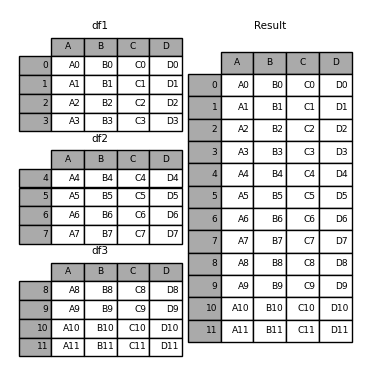

In [ ]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)


df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)


df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)


frames = [df1, df2, df3]

result = pd.concat(frames)
result

In [ ]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)


result = pd.merge(left, right, on="key")
result

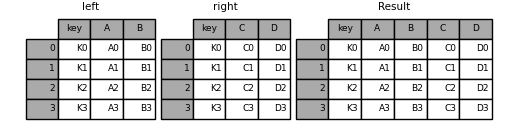

In [ ]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)


df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)


df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)


frames = [df1, df2, df3]

result = pd.concat(frames)
result

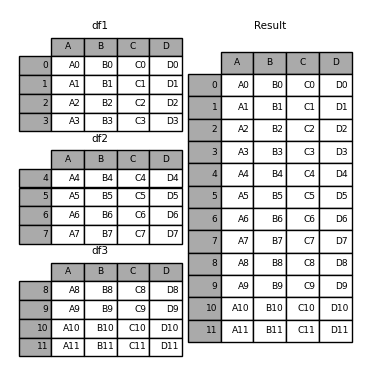

In [ ]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)


result = pd.merge(left, right, on=["key1", "key2"])
result

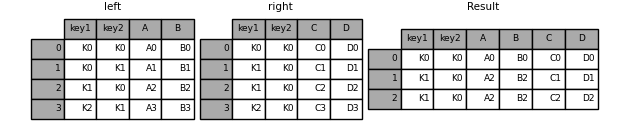

In [ ]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

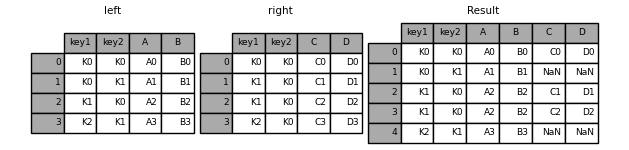

In [ ]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

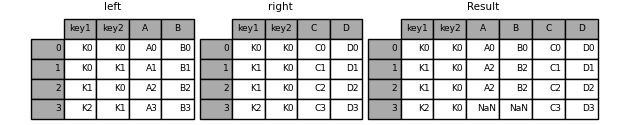

In [ ]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

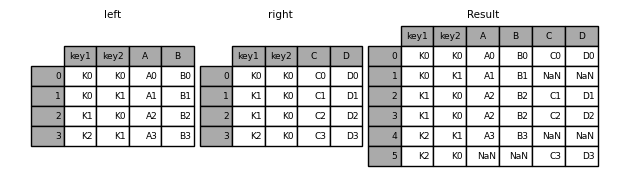

In [ ]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])
result

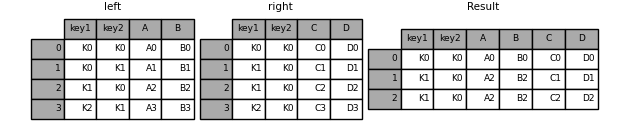

 ## **Task 6:** Read the farmers market data and the division data. Join both the tables such that the division data can be added to the farmers market data

 ## **Task 7:** Direct to consumer marketing is an effective strategy to distribute agricultural and farm products to consumers. Farmers market forms an important link between farmers and consumers that helps foster farmer consumer relationships. The United States Department of Agriculture (USDA) has recognized the importance of farmers markets. Through its many programs, USDA has helped the growth of farmers markets across the country. As on date 8,791 farmers markets are listed in USDA’s National Farmers Market Directory.
The data file contains the following details

a. Variables indicating the geographical location of the farmers market (lat, long, street, county, state etc.)

b. Variables indicating types of products (herbs, vegetables, seafood etc.)

c. Variables indicating type of payment accepted (cash, WIC, SNAP, SFMNP etc.)

d. Variables indicating online social media presence

e. Variables indicating date and time

The directory of farmers market across the US is given in the file

**Answer the following questions:**

1. Write a code to compute the number of farmers markets by state and arrange them in descending order of number of farmers market.

2. Write a code to compute the number of farmers market by cities in Massachusetts and display the top five cities.

3. Generate the following table using pivot function. First column should contain the states. Second column should have Payment System. For Payment System consider the columns, “Credit”, “WIC”, “WICcash”, and “SNAP” from the original farmers market data. Third column should have the number of farmers market offering the payment services. Sample output is given below.

4. Write a code to show the top 5 states by number of farmers market that offer coffee